#  It's *Nir Bahadur Raya.* It's April 01, 2023. Today, I learned about Ridge Regression. I learned about the geometric intuition and the mathematical formulation of Ridge Regression. I used the Ridge Class from sklearn and also created my own class for ridge regression. 

Ridge regression is a form of regularization that introduces a penalty term to the loss function, which helps to reduce the variance of the estimates by shrinking the coefficients towards zero. This penalty term is controlled by a hyperparameter, lambda (λ), which determines the amount of shrinkage applied to the coefficients. As lambda increases, the magnitude of the coefficients decreases, making the model more parsimonious and reducing the risk of overfitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

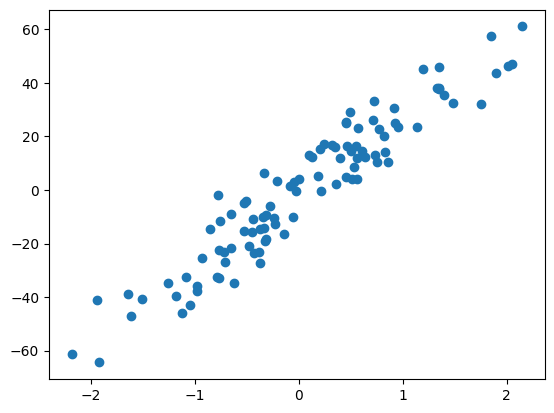

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=10,random_state=13)
plt.scatter(X,y)

In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.71819977]
-1.1473722793384897


In [4]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.85608255]
-0.9802034797539116


In [5]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.88334387]
-0.2809070487085678


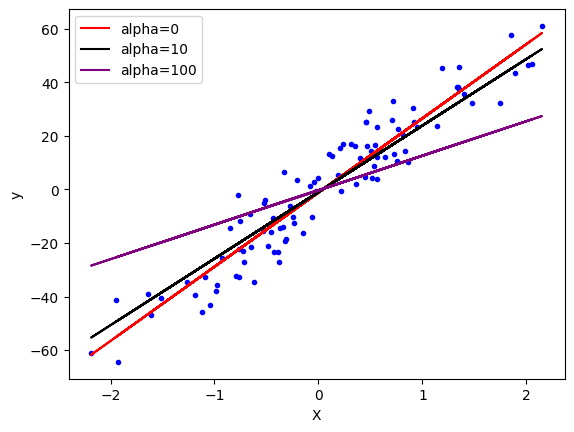

In [6]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='black',label='alpha=10')
plt.plot(X,rr1.predict(X),color='purple',label='alpha=100')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Creating own class for ridge regression 

In [7]:
class MRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [8]:
reg = MRidge(alpha=10)
reg.fit(X,y)     #from sklearn [24.85608255]
                             #-0.9802034797539116

[24.85608255] [-0.98020348]


In [9]:
reg = MRidge(alpha=100)
reg.fit(X,y)            #from sklearn [12.88334387]
                                    #-0.2809070487085678


[12.88334387] [-0.28090705]
